In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [2]:
data = pd.read_csv('D:/PRML assignment 2/Assignment-2/Dataset/A2Q1Data.csv',header=None)

In [3]:
data=np.array(data)

In [4]:
data=data.reshape(1000)

In [5]:
data=data.tolist()

In [10]:
iterations=100
n=len(data)
k=4
iter=30

In [27]:
def generate_randoms():
    r=[random.random() for i in range(0,k)]
    s=np.sum(r)
    r=[i/s for i in r]
    return r

In [28]:
generate_randoms()

[0.28476539416866364,
 0.1802548721448129,
 0.2369467024178167,
 0.29803303126870667]

In [21]:
log_likelihood=[]
for i in range (iter):
    log_likelihood.append(0)

In [14]:
def update_loglikelihood(res,cluster_probability,miu,data):
    for i in range(n):
        t=0
        d=data[i]
        for j in range(k):
            c=cluster_probability[j]
            a=miu[j]
            temp1=a**d
            temp2=(1-a)
            temp3=(1-d)
            temp4=temp2**temp3
            t=t+c*(temp1*temp4)
        if(t!=1):
          res=res+np.log(t)     
    return res

In [29]:
for f in range (iterations):
    miu=[]
    for v in range(k):
        temp=random.uniform(0,1)
        miu.append(temp)
    miu=np.array(miu)
    cluster_probability=generate_randoms()
    lambdas=np.zeros((n,k))
    for p in range (iter):
        for i in range(n):
            d=data[i]
            for j in range(k):
                a=cluster_probability[j]
                b=miu[j]
                temp1=b**d
                temp2=1-b
                temp3=1-d
                temp4=temp2**temp3
                lambdas[i][j]=a*(temp1*temp4)
            sum=np.sum(lambdas,axis=1)[i]
            if(sum==0):
                sum=0.0000001
            lambdas[i]=lambdas[i]/sum
        temp=0
        log_likelihood[p]+=update_loglikelihood(temp,cluster_probability,miu,data)
        for i in range(k):
            temp1=0
            temp2=0
        
            for j in range(n):
                l=lambdas[j][i]
                d=data[j]
                temp1=temp1+d*l
                temp2=temp2+l
            if(temp2==0):
                temp2=0.000001
            miu[i]=temp1/temp2
            cluster_probability[i]=temp2/n

In [31]:
XX=np.zeros(iter)

In [32]:
def final(XX,log_likelihood,iter):

  for i in range(iter):
    log_likelihood[i]=log_likelihood[i]/100
    XX[i]=i
  XX=XX.tolist()
  return XX,log_likelihood


In [33]:
XX,YY=final(XX,log_likelihood,iter)


In [34]:
def plotting(XX,objective):
    plt.figure(figsize=(10,8))
    plt.plot(XX,objective)
    plt.ylabel('Log_likelihood')
    plt.xlabel('range of iterations')
    plt.suptitle('The plotting')
    plt.show()

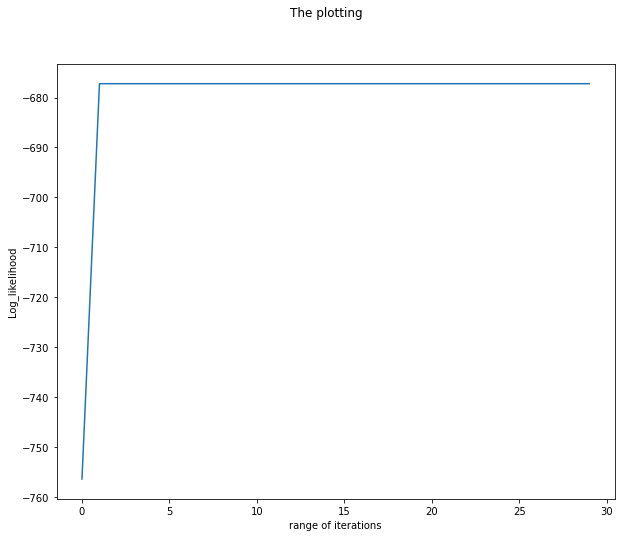

In [35]:
plotting(XX,YY)